<a href="https://colab.research.google.com/github/sriRuchitha/OIB-SIP/blob/main/Project_4_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv("Twitter_Data.csv")

In [ ]:
print("✅ Dataset Loaded Successfully!\n")
print(df.head())
print("\nDataset Info:")
print(df.info())


✅ Dataset Loaded Successfully!

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None


In [ ]:
print("\nMissing values in each column:\n", df.isnull().sum())

# Drop rows where category or clean_text is missing
df = df.dropna(subset=['clean_text', 'category'])


df['category'] = df['category'].astype(int)



Missing values in each column:
 clean_text    0
category      0
dtype: int64


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', str(text))    # remove mentions
    text = re.sub(r'#', '', text)                      # remove hashtags
    text = re.sub(r'RT[\s]+', '', text)                # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)         # remove URLs
    text = re.sub(r'[^A-Za-z ]', '', text)             # remove special chars
    text = text.lower()                                # lowercase
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['clean_text'].apply(clean_tweet)

print("\n✅ Text cleaning done. Sample cleaned text:")
print(df['clean_text'].head())


✅ Text cleaning done. Sample cleaned text:
0    modi promised minimum government maximum gover...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporter prefix chowkidar name modi gr...
4    answer among powerful world leader today trump...
Name: clean_text, dtype: object


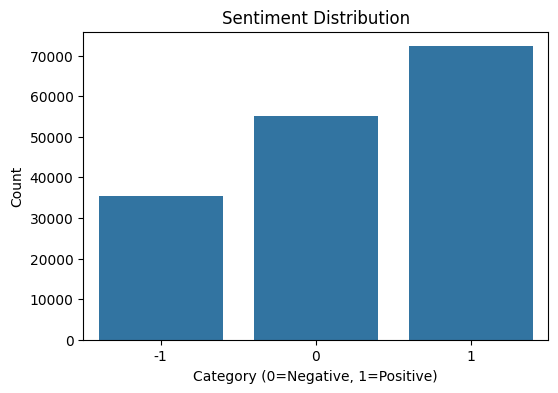

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='category', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Category (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()

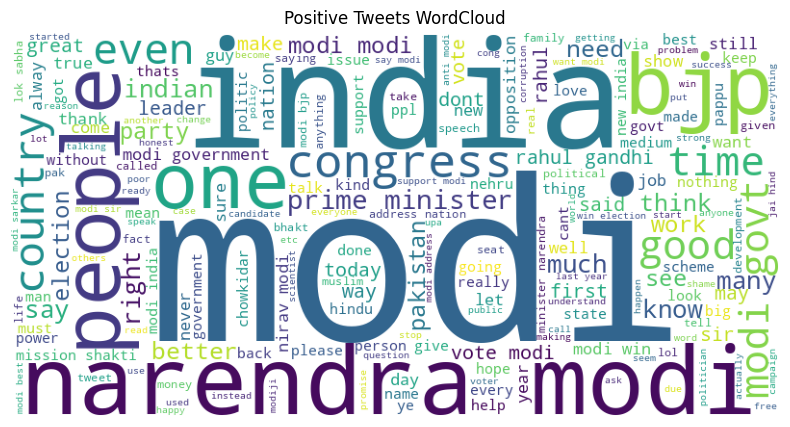

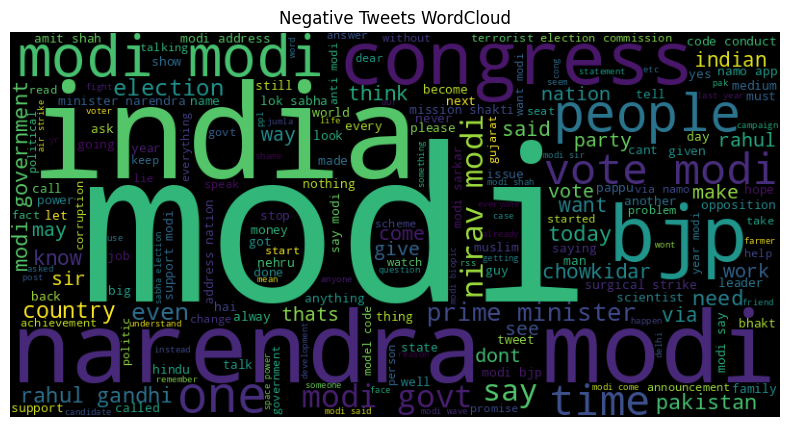

In [ ]:
positive_words = ' '.join(df[df['category']==1]['clean_text'])
negative_words = ' '.join(df[df['category']==0]['clean_text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title("Positive Tweets WordCloud")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title("Negative Tweets WordCloud")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Dataset Loaded Successfully!

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Missing values in each column:
 clean_text    4
category      7
dtype: int64

✅ Text cleaning done. Sample cleaned text:
0    modi promised minimum government maximum gover...
1               talk nonsense continue drama vote modi
2    say

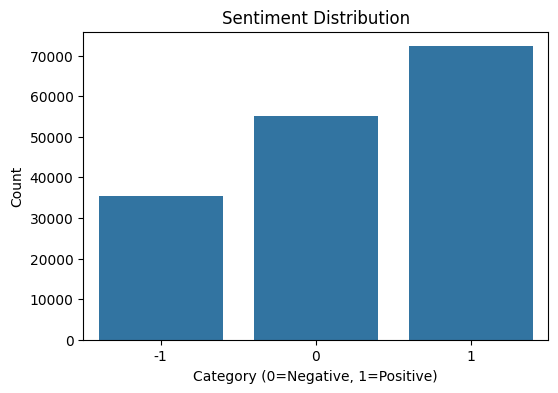

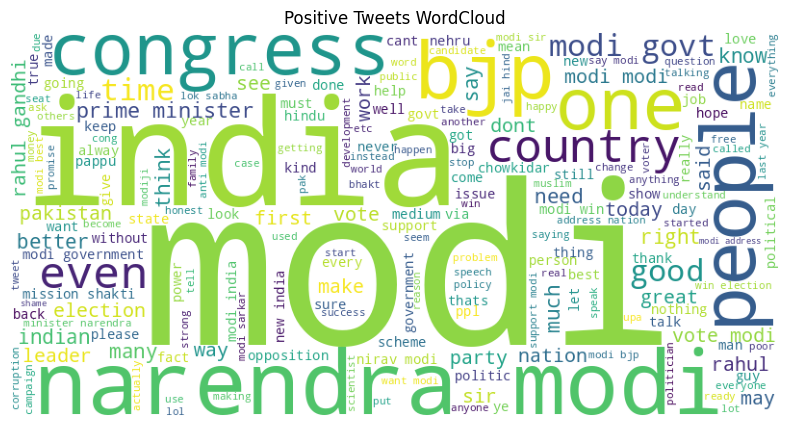

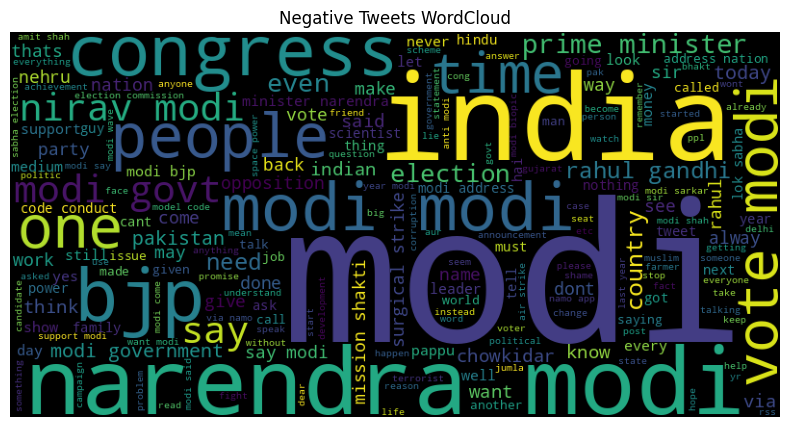


✅ Model training completed successfully!

🔹 Accuracy: 0.7151929803031233

🔹 Classification Report:
               precision    recall  f1-score   support

          -1       0.87      0.42      0.56      7152
           0       0.82      0.64      0.72     11067
           1       0.65      0.92      0.76     14375

    accuracy                           0.72     32594
   macro avg       0.78      0.66      0.68     32594
weighted avg       0.75      0.72      0.70     32594


🔹 Confusion Matrix:
 [[ 2980   745  3427]
 [  137  7137  3793]
 [  306   875 13194]]

Custom Predictions:
Tweet: 'I love this phone!' → Positive 😊
Tweet: 'Worst experience ever' → Neutral 😐


In [ ]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("Twitter_Data.csv")

# Display first few rows
print("✅ Dataset Loaded Successfully!\n")
print(df.head())
print("\nDataset Info:")
print(df.info())

print("\nMissing values in each column:\n", df.isnull().sum())

# Drop rows where category or clean_text is missing
df = df.dropna(subset=['clean_text', 'category'])
df['category'] = df['category'].astype(int)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', str(text))    # remove mentions
    text = re.sub(r'#', '', text)                      # remove hashtags
    text = re.sub(r'RT[\s]+', '', text)                # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)         # remove URLs
    text = re.sub(r'[^A-Za-z ]', '', text)             # remove special chars
    text = text.lower()                                # lowercase
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['clean_text'].apply(clean_tweet)

print("\n✅ Text cleaning done. Sample cleaned text:")
print(df['clean_text'].head())
plt.figure(figsize=(6,4))
sns.countplot(x='category', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Category (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()

positive_words = ' '.join(df[df['category']==1]['clean_text'])
negative_words = ' '.join(df[df['category']==0]['clean_text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title("Positive Tweets WordCloud")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title("Negative Tweets WordCloud")
plt.show()

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
print("\n✅ Model training completed successfully!")

y_pred = model.predict(X_test)

print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

def predict_sentiment(tweet):
    cleaned = clean_tweet(tweet)
    vectorized = vectorizer.transform([cleaned]).toarray()
    pred = model.predict(vectorized)[0]
    if pred == 1:
        return "Positive 😊"
    elif pred == 0:
        return "Negative 😞"
    else:
        return "Neutral 😐"

# Test predictions
print("\nCustom Predictions:")
print("Tweet: 'I love this phone!' →", predict_sentiment("I love this phone!"))
print("Tweet: 'Worst experience ever' →", predict_sentiment("Worst experience ever"))


DataSet Two

In [ ]:
# ✅ Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost plotly joblib openpyxl --quiet


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
from zipfile import ZipFile
import io
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with ZipFile(io.BytesIO(uploaded[fn])) as z:
            csv_name = [f for f in z.namelist() if f.endswith('.csv')][0]
            df = pd.read_csv(z.open(csv_name))
    else:
        df = pd.read_csv(io.BytesIO(uploaded[fn]))

df.head()


Saving apps.csv (2).zip to apps.csv (2).zip


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
import numpy as np
import pandas as pd

def clean_playstore(df):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns]
    df.drop_duplicates(inplace=True)

    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

    if 'Installs' in df.columns:
        df['Installs_clean'] = (df['Installs']
                                .astype(str)
                                .str.replace('[+,]', '', regex=True)
                                .astype(float))

    if 'Price' in df.columns:
        df['Price'] = (df['Price']
                       .astype(str)
                       .str.replace('[$,]', '', regex=True)
                       .astype(float)
                       .fillna(0.0))

    def parse_size(s):
        if pd.isna(s): return np.nan
        s = str(s)
        if s == 'Varies with device': return np.nan
        if s.endswith('M'): return float(s[:-1])
        if s.endswith('k'): return float(s[:-1]) / 1024
        return np.nan
    if 'Size' in df.columns:
        df['Size_MB'] = df['Size'].apply(parse_size)

    if 'Last Updated' in df.columns:
        df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

    if 'Genres' in df.columns:
        df['Primary_Genre'] = df['Genres'].astype(str).str.split(';').str[0]

    if 'Type' in df.columns:
        df['Type'] = df['Type'].astype(str).str.strip().replace({'Free':'Free','Paid':'Paid'})

    return df

df_clean = clean_playstore(df)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   object        
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   int64         
 5   Size            8432 non-null   object        
 6   Installs        9659 non-null   object        
 7   Type            9659 non-null   object        
 8   Price           9659 non-null   float64       
 9   Content Rating  9659 non-null   object        
 10  Genres          9659 non-null   object        
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
 14  Installs_clean  9659 non-null   float64       
 15  Size

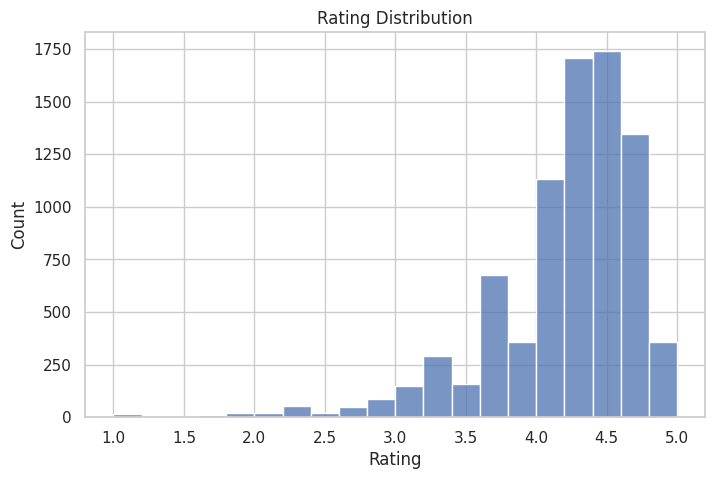

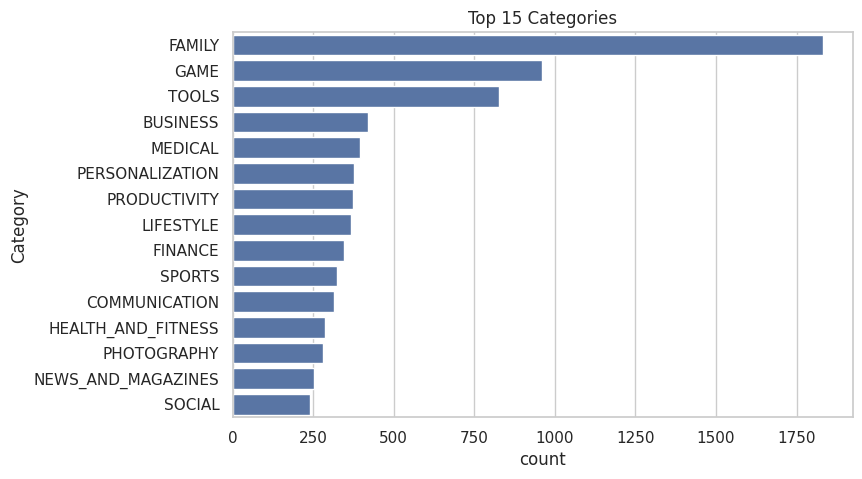

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(df_clean['Rating'], bins=20, kde=False)
plt.title('Rating Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(y='Category', data=df_clean, order=df_clean['Category'].value_counts().index[:15])
plt.title('Top 15 Categories')
plt.show()


In [ ]:
df_model = df_clean.copy()
df_model['popular'] = (df_model['Installs_clean'] >= 100000).astype(int)
df_model['log_reviews'] = np.log1p(df_model['Reviews'])
df_model['log_installs'] = np.log1p(df_model['Installs_clean'].fillna(0))

cat_features = ['Category','Primary_Genre','Content Rating','Type']
df_model = pd.get_dummies(df_model, columns=[c for c in cat_features if c in df_model.columns], drop_first=True)

df_model.head()


,Unnamed: 0,App,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Primary_Genre_Video Players & Editors,Primary_Genre_Weather,Primary_Genre_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid,Type_nan
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0.0,Art & Design,2018-01-07,1.0.0,...,False,False,False,True,False,False,False,False,False,False
1,1,Coloring book moana,3.9,967,14M,"500,000+",0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,...,False,False,False,True,False,False,False,False,False,False
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",0.0,Art & Design,2018-08-01,1.2.4,...,False,False,False,True,False,False,False,False,False,False
3,3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0.0,Art & Design,2018-06-08,Varies with device,...,False,False,False,False,False,False,True,False,False,False
4,4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0.0,Art & Design;Creativity,2018-06-20,1.1,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Ensure all size values are numeric (convert '15M' → 15.0 MB)
def parse_size(s):
    if pd.isna(s): return np.nan
    s = str(s).strip()
    if s == 'Varies with device': return np.nan
    if s.endswith('M'):
        return float(s[:-1])
    if s.endswith('k'):
        return float(s[:-1]) / 1024
    try:
        return float(s)
    except:
        return np.nan

if 'Size' in df_model.columns:
    df_model['Size_MB'] = df_model['Size'].apply(parse_size)
    df_model.drop(columns=['Size'], inplace=True, errors='ignore')


In [ ]:
# Recreate features
df_model['popular'] = (df_model['Installs_clean'] >= 100000).astype(int)
df_model['log_reviews'] = np.log1p(df_model['Reviews'])
df_model['log_installs'] = np.log1p(df_model['Installs_clean'].fillna(0))

cat_features = ['Category','Primary_Genre','Content Rating','Type']
df_model = pd.get_dummies(df_model, columns=[c for c in cat_features if c in df_model.columns], drop_first=True)

# Drop any remaining non-numeric columns
non_numeric_cols = df_model.select_dtypes(exclude=[np.number]).columns
df_model = df_model.drop(columns=non_numeric_cols, errors='ignore')

# Modeling
target = 'popular'
df_clf = df_model.dropna(subset=['Reviews']).copy()
X = df_clf.drop(columns=['App','Installs','Installs_clean','Genres','popular','Rating'], errors='ignore')
y = df_clf[target]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('ROC AUC =', roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00      1003

    accuracy                           1.00      1932
   macro avg       1.00      1.00      1.00      1932
weighted avg       1.00      1.00      1.00      1932

ROC AUC = 1.0


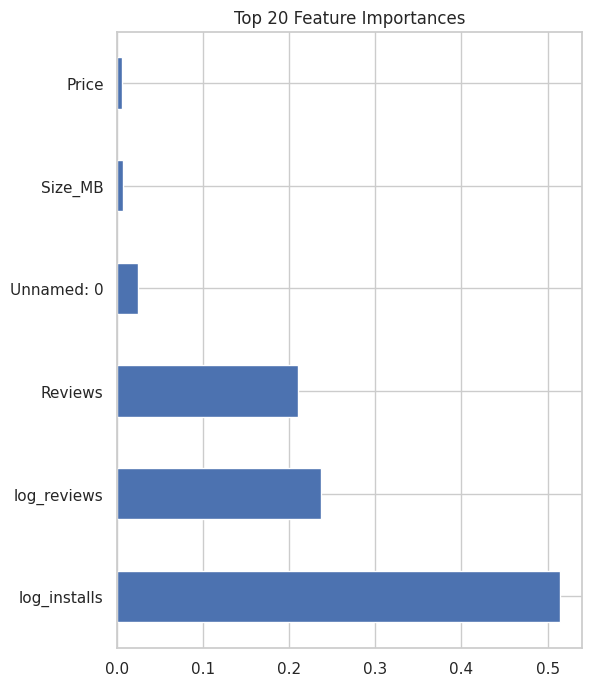

In [ ]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(6,8))
importances.plot.barh()
plt.title('Top 20 Feature Importances')
plt.show()
